<a href="https://colab.research.google.com/github/SonamTenzin7/Binary-Classification/blob/main/Dimentia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
data = pd.read_csv("dataset.csv")

In [ ]:
print(data.head())

   Unnamed: 0  Age  Gender  Body_Height  Body_Weight  Education_ID  \
0           1   86       0        148.3         61.1           1.0   
1           2   92       1        156.2         61.5           NaN   
2           3   81       0        146.3         47.0           NaN   
3           4   79       0        152.2         65.3           NaN   
4           5   86       0        157.3         57.3           1.0   

   Financial_status  GDS  Independent_or_depend_on_family  Marital_status_ID  \
0               8.0  5.0                              0.0                3.0   
1               4.0  2.0                              0.0                2.0   
2               2.0  3.0                              0.0                3.0   
3               2.0  3.0                              0.0                1.0   
4               2.0  2.0                              0.0                3.0   

   MNAa_total  MNAb_total  MMSE_class_binary  
0        12.0        10.5                  0  
1   

In [ ]:
import pandas as pd

In [ ]:
data = data[~((data['Gender'] == 0) | (data['Body_Height'] == 0) | (data['Body_Weight'] == 0))]
print("Number of rows after removing specific values:", len(data))
print(data.head())

Number of rows after removing specific values: 732
    Unnamed: 0  Age  Gender  Body_Height  Body_Weight  Education_ID  \
1            2   92       1        156.2         61.5           NaN   
33          34   77       1        163.0         70.5           NaN   
36          37   90       1        152.4         56.3           1.0   
41          42   91       1        169.0         69.2           2.0   
49          50   86       1        153.1         54.2           2.0   

    Financial_status  GDS  Independent_or_depend_on_family  Marital_status_ID  \
1                4.0  2.0                              0.0                2.0   
33               1.0  3.0                              1.0                2.0   
36               5.0  9.0                              1.0                2.0   
41               2.0  3.0                              0.0                2.0   
49               2.0  5.0                              0.0                3.0   

    MNAa_total  MNAb_total  MMSE_cl

In [ ]:
print(data.isnull().sum())

Unnamed: 0                           0
Age                                  0
Gender                               0
Body_Height                          0
Body_Weight                          0
Education_ID                        21
Financial_status                    29
GDS                                 31
Independent_or_depend_on_family     29
Marital_status_ID                   29
MNAa_total                         104
MNAb_total                         131
MMSE_class_binary                    0
dtype: int64


In [ ]:
data = data.dropna(subset=[
    'Education_ID',
    'Financial_status',
    'GDS',
    'Independent_or_depend_on_family',
    'Marital_status_ID',
    'MNAa_total',
    'MNAb_total'
])
print("Number of rows after removing rows with NaN in specified columns:", len(data))
print(data.head())

Number of rows after removing rows with NaN in specified columns: 566
    Unnamed: 0  Age  Gender  Body_Height  Body_Weight  Education_ID  \
36          37   90       1        152.4         56.3           1.0   
41          42   91       1        169.0         69.2           2.0   
49          50   86       1        153.1         54.2           2.0   
50          51   90       1        162.0         79.4           1.0   
55          56   78       1        156.5         68.4           2.0   

    Financial_status  GDS  Independent_or_depend_on_family  Marital_status_ID  \
36               5.0  9.0                              1.0                2.0   
41               2.0  3.0                              0.0                2.0   
49               2.0  5.0                              0.0                3.0   
50               2.0  9.0                              0.0                6.0   
55               1.0  2.0                              1.0                2.0   

    MNAa_total  

In [ ]:
# Define features and target variable
X = data.drop(columns=['MMSE_class_binary'])  # Features
y = data['MMSE_class_binary']  # Target variable


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (452, 12)
Testing data shape: (114, 12)


In [ ]:
# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Print confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[100   3]
 [ 11   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       103
           1       0.00      0.00      0.00        11

    accuracy                           0.88       114
   macro avg       0.45      0.49      0.47       114
weighted avg       0.81      0.88      0.84       114



In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8771929824561403


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


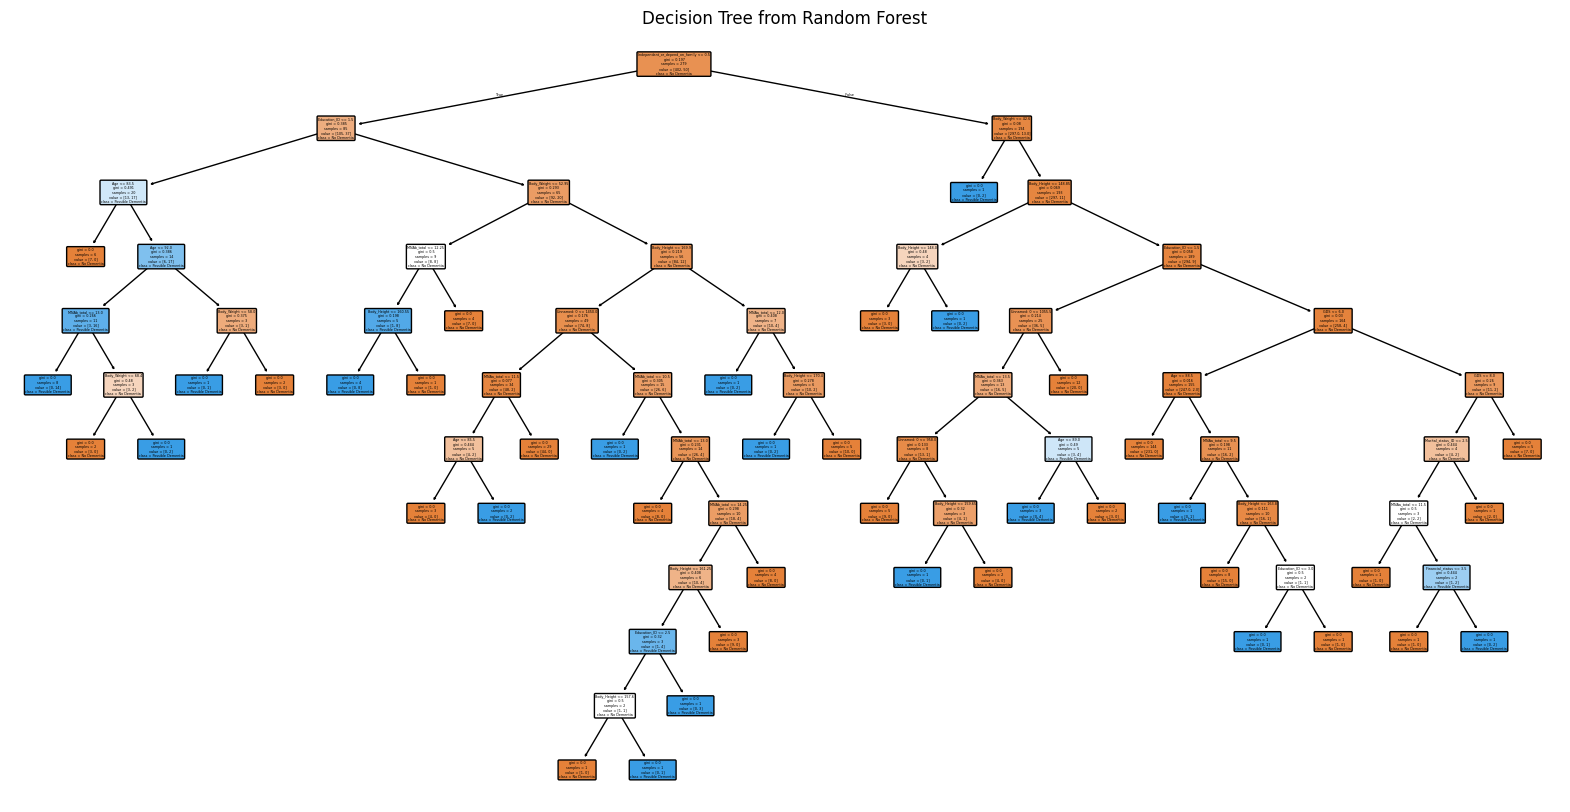

In [ ]:
# Display a single decision tree from the random forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
           feature_names=X.columns,
           class_names=['No Dementia', 'Possible Dementia'],
           filled=True,
           rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()